# Module 6
### Welcome to the Answer notebook for Module 6 !


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive




---


##Query 6.1 

    Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps


In [0]:
import os
import glob 
import pandas as pd
import sklearn
import numpy as np

from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)    #to fix the size of our graph for better visualization.
import seaborn as sn


**The first task to perform is to get closing prices for 30 different stocks, 10 from each cap, in a single data frame. I have already cleaned up all the datasets and put them together in a folder data_module_6. We will get this folder from Google Drive.**

**Link : https://drive.google.com/open?id=1fhZUEHiWkmdZeiLQIeYnzRifcS_i_7d5**

In [0]:
os.chdir('drive/My Drive/data_module_6')

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

**Now we have all the 30 stock files from our folder, next task would be get closing_prices for each stock, since closing_price is 8th column in each file, we would just get that column from each. A helper function read_8th_col does that job.**

In [0]:
def read_8th_col(file):
    return pd.read_csv(file, usecols=[8])

In [0]:
combined_data = pd.concat([read_8th_col(file) for file in all_filenames], axis=1)

combined_data.head()

,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price,Close Price
0,414.00,30.25,1633.50,578.55,933.40,983.25,231.90,259.5,75.05,727.85,63.70,266.65,569.00,2675.80,442.10,19.6,83.55,4614.05,1169.70,1742.40,199.20,32.00,90.25,431.85,277.95,114.20,6823.90,772.80,1344.10,162.65
1,411.40,32.85,1634.25,584.80,924.70,1000.40,234.40,261.5,76.65,733.30,64.25,266.10,565.60,2724.10,446.60,19.7,83.85,4589.80,1177.00,1740.70,200.90,32.10,90.65,432.45,283.45,114.10,6953.95,785.00,1356.30,158.60
2,408.30,33.10,1654.35,588.60,937.70,1009.40,237.35,260.9,75.95,727.45,63.35,264.85,562.35,2736.90,444.25,19.9,85.35,4637.25,1188.00,1755.45,199.65,31.95,88.85,430.20,281.65,116.40,6958.20,783.65,1353.10,158.25
3,404.75,31.90,1633.40,574.60,912.10,990.25,232.65,254.1,69.95,714.90,61.50,260.35,560.10,2678.95,439.90,20.0,83.75,4544.45,1156.90,1722.60,193.30,31.05,86.90,414.10,277.90,113.30,6831.05,746.95,1327.35,157.40
4,401.05,32.40,1670.25,578.00,895.75,1008.00,234.65,247.8,68.75,702.45,61.15,254.05,564.95,2656.45,435.40,20.6,84.15,4522.70,1161.65,1724.55,195.95,30.55,85.05,415.75,286.20,112.15,6790.55,723.10,1318.85,151.90


**Now we have closing prices for each of the stock in our dataframe, combined_data. The next task would be rename each of the column head with name of the stock. So that each column represents a new stock.**

In [0]:
names=[]
for name in all_filenames:
  names.append(name.split('.')[0])

In [0]:
combined_data.columns = combined_data.columns[:0].tolist() + names

In [0]:
combined_data.head()

,GAIL,ADANIPOWER,AJANTPHARM,GODREJIND,AMARAJABAT,HINDUNILVR,APOLLOTYRE,BERGEPAINT,IDBI,BPCL,IDFC,CENTURYPLY,CIPLA,DRREDDY,IOC,SUZLON,TATAPOWER,LAXMIMACH,VENKEYS,LT,VIPIND,RCOM,WELSPUNIND,VOLTAS,ITC,JINDALSTEL,MARUTI,RAYMOND,RELIANCE,SONATSOFTW
0,414.00,30.25,1633.50,578.55,933.40,983.25,231.90,259.5,75.05,727.85,63.70,266.65,569.00,2675.80,442.10,19.6,83.55,4614.05,1169.70,1742.40,199.20,32.00,90.25,431.85,277.95,114.20,6823.90,772.80,1344.10,162.65
1,411.40,32.85,1634.25,584.80,924.70,1000.40,234.40,261.5,76.65,733.30,64.25,266.10,565.60,2724.10,446.60,19.7,83.85,4589.80,1177.00,1740.70,200.90,32.10,90.65,432.45,283.45,114.10,6953.95,785.00,1356.30,158.60
2,408.30,33.10,1654.35,588.60,937.70,1009.40,237.35,260.9,75.95,727.45,63.35,264.85,562.35,2736.90,444.25,19.9,85.35,4637.25,1188.00,1755.45,199.65,31.95,88.85,430.20,281.65,116.40,6958.20,783.65,1353.10,158.25
3,404.75,31.90,1633.40,574.60,912.10,990.25,232.65,254.1,69.95,714.90,61.50,260.35,560.10,2678.95,439.90,20.0,83.75,4544.45,1156.90,1722.60,193.30,31.05,86.90,414.10,277.90,113.30,6831.05,746.95,1327.35,157.40
4,401.05,32.40,1670.25,578.00,895.75,1008.00,234.65,247.8,68.75,702.45,61.15,254.05,564.95,2656.45,435.40,20.6,84.15,4522.70,1161.65,1724.55,195.95,30.55,85.05,415.75,286.20,112.15,6790.55,723.10,1318.85,151.90


**We now have a neat and clean dataframe to continue with.**



---


##Query 6.2 

    Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [0]:
len(combined_data)

494

**We can see that for each stock we have records for last 494 days(each row represent a different day).  Since we need to calculate the the returns over the last theoratical year, we would get the latest 252  rows from our dataset.**

**252 days : Ideally 1 year in Stock Market.**



In [0]:
yearly_combined_data= combined_data[242:]

yearly_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 242 to 493
Data columns (total 30 columns):
GAIL          252 non-null float64
ADANIPOWER    252 non-null float64
AJANTPHARM    252 non-null float64
GODREJIND     252 non-null float64
AMARAJABAT    252 non-null float64
HINDUNILVR    252 non-null float64
APOLLOTYRE    252 non-null float64
BERGEPAINT    252 non-null float64
IDBI          252 non-null float64
BPCL          252 non-null float64
IDFC          252 non-null float64
CENTURYPLY    252 non-null float64
CIPLA         252 non-null float64
DRREDDY       252 non-null float64
IOC           252 non-null float64
SUZLON        252 non-null float64
TATAPOWER     252 non-null float64
LAXMIMACH     252 non-null float64
VENKEYS       252 non-null float64
LT            252 non-null float64
VIPIND        252 non-null float64
RCOM          252 non-null float64
WELSPUNIND    252 non-null float64
VOLTAS        252 non-null float64
ITC           252 non-null float64
JINDALSTEL    252 

**We now have the data for last year, we can calculate returns and volatility on it.**

**Mean avg. Return =  daily mean * 252**

**Volatility = std(daily mean) * sqrt(252)**

In [0]:
import math
returns = yearly_combined_data.pct_change().mean() * 252
volatility = yearly_combined_data.pct_change().std() * math.sqrt(252)


returns.columns = ["Returns"]
volatility.columns = ["Variance"]

**We now have the annual returns and volatility for each stock, next task would be concatenate them in a single dataframe against stock.**

In [0]:
#Concatenating the returns and variances into a single data-frame
ret_vol = pd.concat([returns, volatility], axis = 1).dropna()
ret_vol.columns = ["Returns","Volatility"]

In [0]:
ret_vol.info()

ret_vol

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, GAIL to SONATSOFTW
Data columns (total 2 columns):
Returns       30 non-null float64
Volatility    30 non-null float64
dtypes: float64(2)
memory usage: 720.0+ bytes


,Returns,Volatility
GAIL,0.055334,0.310841
ADANIPOWER,0.676894,0.724484
AJANTPHARM,-0.076660,0.355356
GODREJIND,-0.219698,0.270063
AMARAJABAT,-0.283856,0.262619
HINDUNILVR,0.173223,0.210756
APOLLOTYRE,-0.384620,0.309000
BERGEPAINT,0.135802,0.274411
IDBI,-0.549071,0.413379
BPCL,0.027123,0.429338




---


##Query 6.3 
    
    Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method.
   

**We are going to perform the elbow curve method on our dataframe to find the optimum number of clusters for our K-Means algorithm.**

**We will use inertia and distortion to decides the number of clusters.**

**The point after which the distortion/inertia start decreasing in a linear fashion, tell us the optimum number of clusters.**

In [0]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

**The first task is to find out the values for inertia and distortion for clusters in range of 1 to 10.**

In [0]:
X =  ret_vol.values #Converting ret_vol into nummpy array
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

**Now we will use the dictonaries : mapping1{} and mapping2{} in to find and plot the key-value pairs.** 

In [0]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 0.3151525031751138
2 : 0.2163419809465828
3 : 0.16886551879346826
4 : 0.14097517755600242
5 : 0.11923129666724672
6 : 0.09953170932019482
7 : 0.08715629926345828
8 : 0.07726010798992891
9 : 0.06805120914035843


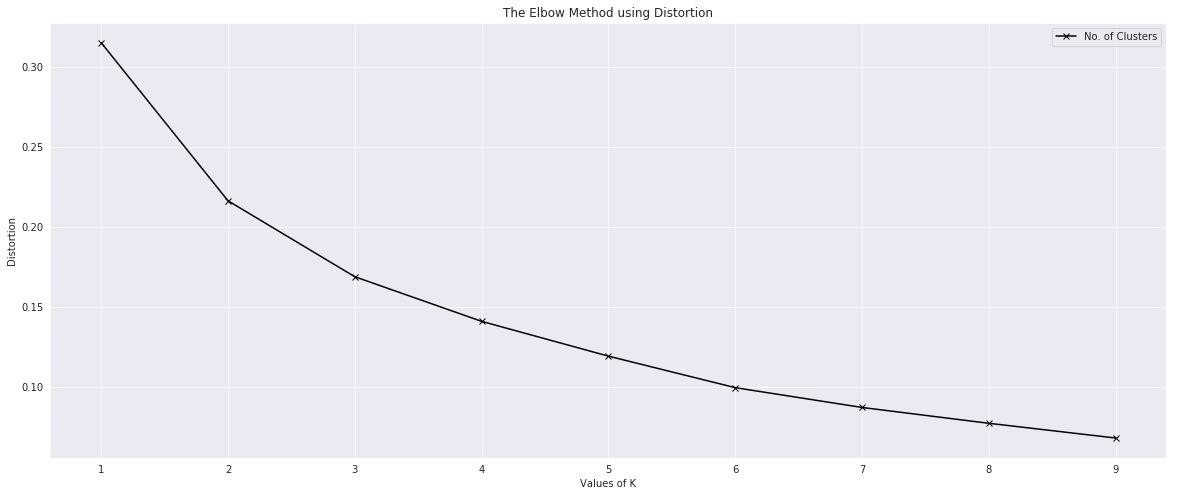

In [0]:
fig = plt.figure()
sns.set_style("darkgrid")
# Add a subplot and label for y-axis
ax = fig.add_subplot(111, title='The Elbow Method using Distortion', xlabel= 'Values of K', ylabel='Distortion')
plt.plot(K, distortions, 'kx-') 
plt.legend(['No. of Clusters'])
plt.show() 

In [0]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 5.00831183247681
2 : 2.609639785747243
3 : 1.2846989288921251
4 : 0.7837406165691517
5 : 0.5442296522891678
6 : 0.3749590374615737
7 : 0.28128319014592046
8 : 0.23133566472228215
9 : 0.1904659908818638


[]

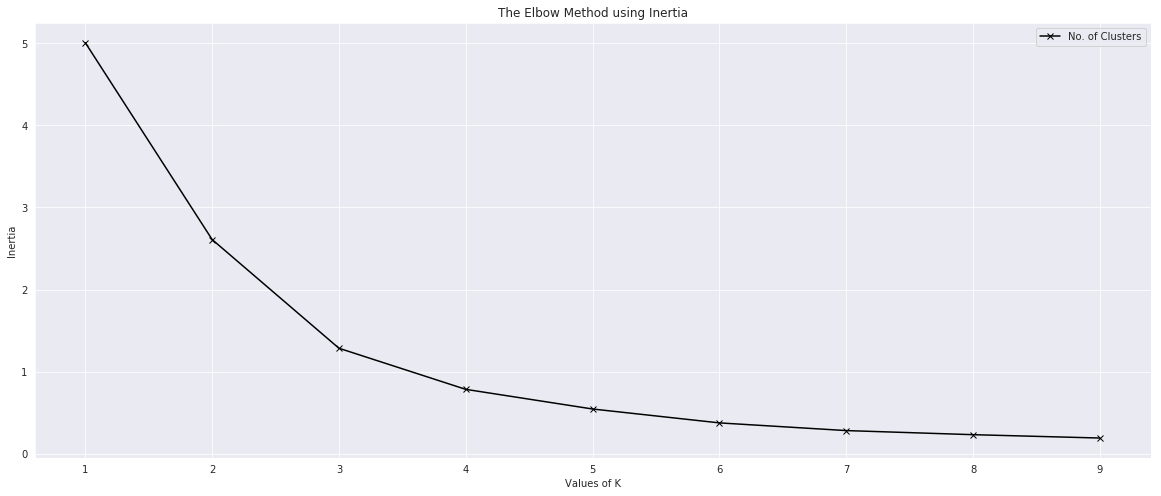

In [0]:
fig = plt.figure()
sns.set_style("darkgrid")
# Add a subplot and label for y-axis
ax = fig.add_subplot(111, title='The Elbow Method using Inertia', xlabel= 'Values of K', ylabel='Inertia')
ax = plt.plot(K, inertias, 'kx-') 
plt.legend(['No. of Clusters'])
plt.plot()

**We can analyze the graphs and understand that after point 6 we have a straight line, so 6 is the optimum number of clusters for our data.**

**Thus, Optimum Number of Clusters = 6**



---


##Query 6.4 

    Prepare a separate Data frame to show which stocks belong to the same cluster 

**We will first make a copy of our dataframe, find out clusters for each stock, add cluster column to copy of our data, and perform groupby operation.**

In [0]:
kmeans = KMeans(n_clusters = 6).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [0]:
cluster_data= ret_vol

cluster_data['clusters'] = labels

In [0]:
#Lets analyze the clusters
print(cluster_data.groupby(['clusters']))

In [0]:
cluster_data

,Returns,Volatility,clusters
GAIL,0.055334,0.310841,0
ADANIPOWER,0.676894,0.724484,3
AJANTPHARM,-0.076660,0.355356,0
GODREJIND,-0.219698,0.270063,4
AMARAJABAT,-0.283856,0.262619,4
HINDUNILVR,0.173223,0.210756,5
APOLLOTYRE,-0.384620,0.309000,4
BERGEPAINT,0.135802,0.274411,5
IDBI,-0.549071,0.413379,2
BPCL,0.027123,0.429338,0


**We now have our required data to continue plotting a scatterplot, but to add the stock name to each of the data point, we would create another column with the names for a stock.**

In [0]:
cluster_data['names']= cluster_data.index

<Figure size 1440x576 with 0 Axes>

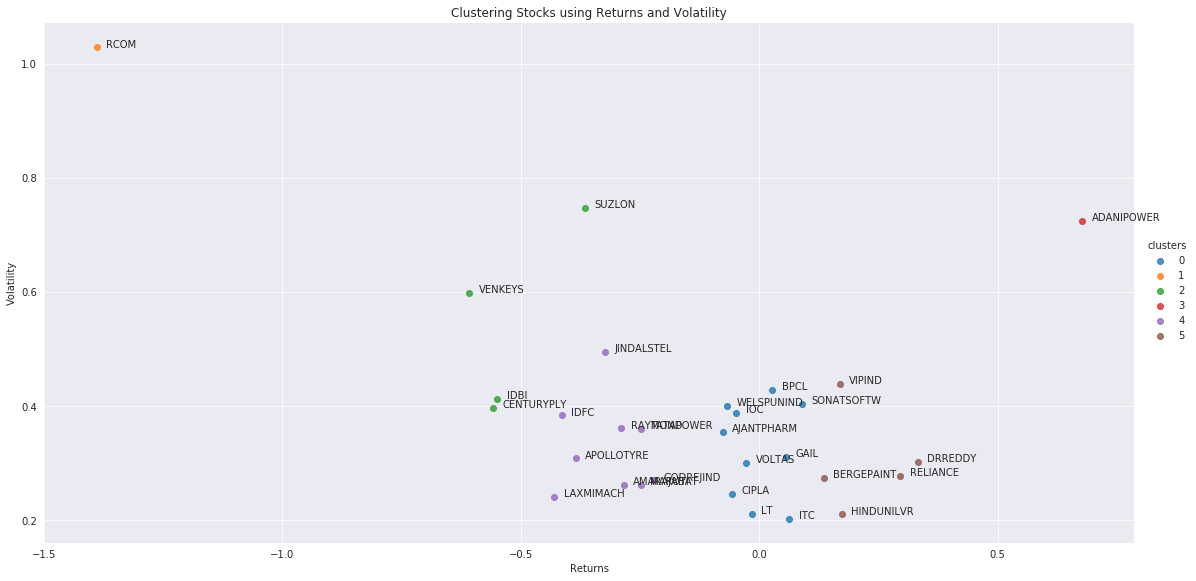

In [0]:
plt.figure()
fig.add_subplot(111, title='Clustering Stocks using Returns and Volatility', ylabel='Volatility', xlabel='Returns')

ax = sns.lmplot('Returns', # Horizontal axis
           'Volatility', # Vertical axis
           data=cluster_data, # Data source
           fit_reg=False, # Don't fix a regression line
           hue= "clusters",
           aspect= 2,
           height= 8
           ) # size and dimension

plt.title('Clustering Stocks using Returns and Volatility')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(cluster_data.Returns, cluster_data.Volatility, cluster_data.names, plt.gca())  

**We have sucessfully plotted all the stocks in a Returns VS volatility plot and also clustered them.**


---



---


**END.**

**THANKS Career Launcher for giving an opportunity to work on such a wonderful Project.**